# Data Exploration & Cleaning

In [215]:
import pandas as pd
import numpy as np
import re

# Importing the 4 dataframes containing all raw data
from extract_into_dfs import academy_csvs_df, talent_csvs_df, talent_jsons_df, talent_txts_df

## Cleaning Academy CSVs

In [216]:
academy_csvs_df['name'].duplicated().sum()

# This equals 0, i.e. there are no duplicated names

0

In [217]:
# Checking for near duplicates
from fuzzywuzzy import fuzz

academy_csvs_df['Similarity to other names'] = academy_csvs_df['name'].apply(lambda x: fuzz.token_set_ratio(x, academy_csvs_df['name']))

academy_csvs_df[['name', 'Similarity to other names']].sort_values('Similarity to other names')

,name,Similarity to other names
111,MONA ORVISS,4
87,OMERO SHILL,4
21,VERNE FRANCESCUZZI,4
391,HORTEN KOOMAR,4
367,LILLY ANDREASEN,4
...,...,...
3,YOLANDA FOSSE,100
2,GUSTAF LUDE,100
1,SIMON MURREY,100
395,THOM DERWIN,100


<Axes: xlabel='Similarity to other names', ylabel='Count'>

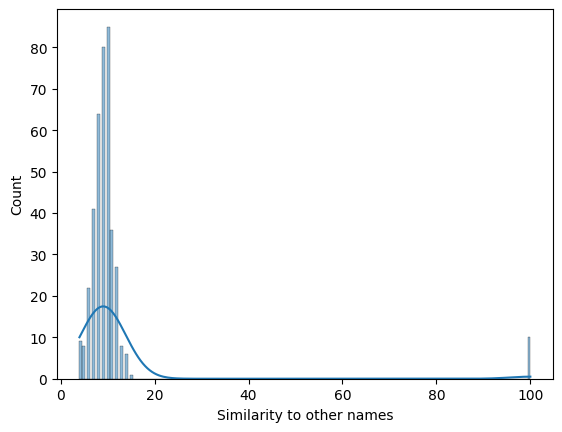

In [218]:
# Plotting the result of this using seaborn

import seaborn as sns

sns.histplot(academy_csvs_df['Similarity to other names'], kde=True)

In [219]:
# Showing table of names with similarity to other names above 80

academy_csvs_df[academy_csvs_df['Similarity to other names'] > 80].sort_values('name')

,name,trainer,Analytic_W1,Independent_W1,Determined_W1,Professional_W1,Studious_W1,Imaginative_W1,Analytic_W2,Independent_W2,...,Professional_W9,Studious_W9,Imaginative_W9,Analytic_W10,Independent_W10,Determined_W10,Professional_W10,Studious_W10,Imaginative_W10,Similarity to other names
393,CHAIM INSEAL,MOHAMMAD VELAZQUEZ,1,3,3,4,1,2,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
394,GERTRUDA SYDDIE,MOHAMMAD VELAZQUEZ,3,1,2,8,1,4,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
396,GODFRY SEPHTON,MOHAMMAD VELAZQUEZ,4,2,5,1,1,2,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
2,GUSTAF LUDE,GREGOR GOMEZ,6,4,1,1,2,3,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
4,LYNNETT SWIN,GREGOR GOMEZ,2,2,4,5,1,2,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
392,MORITZ MOSEDALL,MOHAMMAD VELAZQUEZ,1,1,5,1,2,6,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
0,QUINTUS PENELLA,GREGOR GOMEZ,1,2,2,1,2,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
1,SIMON MURREY,GREGOR GOMEZ,6,1,1,2,4,2,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
395,THOM DERWIN,MOHAMMAD VELAZQUEZ,3,7,3,3,3,1,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
3,YOLANDA FOSSE,GREGOR GOMEZ,2,1,2,3,3,3,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100


In [220]:
# Since none of these are similar to eachother, we will assume no duplicate names

In [221]:
# Converting the names to upper case for consistency

academy_csvs_df['name'] = academy_csvs_df['name'].str.strip().str.upper()

In [222]:
# Checking names of trainers for misspellings

academy_csvs_df['trainer'].unique()

# It seems Ely Kely is actually Elly Kelly

array(['GREGOR GOMEZ', 'BRUCE LUGO', 'NEIL MCCARTHY', 'RACHEL RICHARD',
       'HAMZAH MELIA', 'BURHAN MILNER', 'ELLY KELLY', 'TRIXIE ORANGE',
       'JOHN SANDBOX', 'EDWARD REINHART', 'LUCY FOSTER',
       'GINA CARTWRIGHT', 'ESHAL BRANDT', 'MACEY BROUGHTON',
       'IGOR COATES', 'MOHAMMAD VELAZQUEZ', 'MARTINA MEADOWS'],
      dtype=object)

In [223]:
# Replacing Ely Kely in trainers with Elly Kelly

academy_csvs_df['trainer'].replace('Ely Kely', 'Elly Kelly', inplace=True)

academy_csvs_df['trainer'].unique()

array(['GREGOR GOMEZ', 'BRUCE LUGO', 'NEIL MCCARTHY', 'RACHEL RICHARD',
       'HAMZAH MELIA', 'BURHAN MILNER', 'ELLY KELLY', 'TRIXIE ORANGE',
       'JOHN SANDBOX', 'EDWARD REINHART', 'LUCY FOSTER',
       'GINA CARTWRIGHT', 'ESHAL BRANDT', 'MACEY BROUGHTON',
       'IGOR COATES', 'MOHAMMAD VELAZQUEZ', 'MARTINA MEADOWS'],
      dtype=object)

In [224]:
# Checking if Ely Kely was once a trainee (but her actual name is Elly Kelly)
len(academy_csvs_df[academy_csvs_df['name'] == 'Ely Kely'])

0

In [225]:
# Converting the trainer to upper case for consistency

academy_csvs_df['trainer'] = academy_csvs_df['trainer'].str.upper()

In [226]:
import numpy as np
import pandas as pd

df_minus_names = academy_csvs_df.iloc[0:, 2:]
df_minus_names = df_minus_names.drop(['Cohort Name', 'Cohort Date'], axis=1)

non_whole_values = df_minus_names.mod(1) != 0

(df_minus_names.isna().sum() == non_whole_values.sum()).sum() / len(df_minus_names.columns)

1.0

In [227]:
academy_csvs_df

,name,trainer,Analytic_W1,Independent_W1,Determined_W1,Professional_W1,Studious_W1,Imaginative_W1,Analytic_W2,Independent_W2,...,Professional_W9,Studious_W9,Imaginative_W9,Analytic_W10,Independent_W10,Determined_W10,Professional_W10,Studious_W10,Imaginative_W10,Similarity to other names
0,QUINTUS PENELLA,GREGOR GOMEZ,1,2,2,1,2,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
1,SIMON MURREY,GREGOR GOMEZ,6,1,1,2,4,2,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
2,GUSTAF LUDE,GREGOR GOMEZ,6,4,1,1,2,3,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
3,YOLANDA FOSSE,GREGOR GOMEZ,2,1,2,3,3,3,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
4,LYNNETT SWIN,GREGOR GOMEZ,2,2,4,5,1,2,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,MORITZ MOSEDALL,MOHAMMAD VELAZQUEZ,1,1,5,1,2,6,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
393,CHAIM INSEAL,MOHAMMAD VELAZQUEZ,1,3,3,4,1,2,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
394,GERTRUDA SYDDIE,MOHAMMAD VELAZQUEZ,3,1,2,8,1,4,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
395,THOM DERWIN,MOHAMMAD VELAZQUEZ,3,7,3,3,3,1,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100


In [228]:
academy_csvs_df.dtypes

name                          object
trainer                       object
Analytic_W1                    int64
Independent_W1                 int64
Determined_W1                  int64
                              ...   
Determined_W10               float64
Professional_W10             float64
Studious_W10                 float64
Imaginative_W10              float64
Similarity to other names      int64
Length: 65, dtype: object

### Function to clean academy_csv_df

In [229]:
def clean_academy_csvs_df(df):

    df['name'] = df['name'].str.strip().upper()

    df['trainer'].replace('Ely Kely', 'Elly Kelly', inplace=True)
    
    df['trainer'] = df['trainer'].str.upper()

    df[['Analytic_W1', 'Independent_W1', 'Determined_W1', 'Professional_W1',
       'Studious_W1', 'Imaginative_W1', 'Analytic_W2', 'Independent_W2',
       'Determined_W2', 'Professional_W2', 'Studious_W2', 'Imaginative_W2',
       'Analytic_W3', 'Independent_W3', 'Determined_W3', 'Professional_W3',
       'Studious_W3', 'Imaginative_W3', 'Analytic_W4', 'Independent_W4',
       'Determined_W4', 'Professional_W4', 'Studious_W4', 'Imaginative_W4',
       'Analytic_W5', 'Independent_W5', 'Determined_W5', 'Professional_W5',
       'Studious_W5', 'Imaginative_W5', 'Analytic_W6', 'Independent_W6',
       'Determined_W6', 'Professional_W6', 'Studious_W6', 'Imaginative_W6',
       'Analytic_W7', 'Independent_W7', 'Determined_W7', 'Professional_W7',
       'Studious_W7', 'Imaginative_W7', 'Analytic_W8', 'Independent_W8',
       'Determined_W8', 'Professional_W8', 'Studious_W8', 'Imaginative_W8',
       'Analytic_W9', 'Independent_W9', 'Determined_W9', 'Professional_W9',
       'Studious_W9', 'Imaginative_W9', 'Analytic_W10', 'Independent_W10',
       'Determined_W10', 'Professional_W10', 'Studious_W10', 'Imaginative_W10']] = df[['Analytic_W1', 'Independent_W1', 'Determined_W1', 'Professional_W1',
       'Studious_W1', 'Imaginative_W1', 'Analytic_W2', 'Independent_W2',
       'Determined_W2', 'Professional_W2', 'Studious_W2', 'Imaginative_W2',
       'Analytic_W3', 'Independent_W3', 'Determined_W3', 'Professional_W3',
       'Studious_W3', 'Imaginative_W3', 'Analytic_W4', 'Independent_W4',
       'Determined_W4', 'Professional_W4', 'Studious_W4', 'Imaginative_W4',
       'Analytic_W5', 'Independent_W5', 'Determined_W5', 'Professional_W5',
       'Studious_W5', 'Imaginative_W5', 'Analytic_W6', 'Independent_W6',
       'Determined_W6', 'Professional_W6', 'Studious_W6', 'Imaginative_W6',
       'Analytic_W7', 'Independent_W7', 'Determined_W7', 'Professional_W7',
       'Studious_W7', 'Imaginative_W7', 'Analytic_W8', 'Independent_W8',
       'Determined_W8', 'Professional_W8', 'Studious_W8', 'Imaginative_W8',
       'Analytic_W9', 'Independent_W9', 'Determined_W9', 'Professional_W9',
       'Studious_W9', 'Imaginative_W9', 'Analytic_W10', 'Independent_W10',
       'Determined_W10', 'Professional_W10', 'Studious_W10', 'Imaginative_W10']].astype(int, errors='ignore')

## Talent CSV's

In [230]:
# Checking for duplicated names
talent_csvs_df[talent_csvs_df['name'].duplicated() == True]

,id,name,gender,dob,email,city,address,postcode,phone_number,uni,degree,invited_date,month,invited_by
3136,16,SHURLOCKE CRINGLE,Male,27/11/1995,NaN,Pentre,92427 Thierer Road,SY4,+44 947 829 3817,University of Leicester,2:2,21.0,May 2019,Rupert Ripple
3521,10,NICOLETTE BONEHILL,Female,14/08/1999,neebee9@addthis.com,East End,589 Columbus Way,BH21,+44-364-359-2606,Cranfield University,2:1,19.0,NOVEMBER 2019,Rupert Ripple


In [231]:
talent_csvs_df[talent_csvs_df['name'] == 'Shurlocke Cringle']

# These two appear to have the same name but be two different people

,id,name,gender,dob,email,city,address,postcode,phone_number,uni,degree,invited_date,month,invited_by


In [232]:
talent_csvs_df[talent_csvs_df['name'] == 'Nicolette Bonehill']

# These two appear to have the same name but be two different people

,id,name,gender,dob,email,city,address,postcode,phone_number,uni,degree,invited_date,month,invited_by


In [233]:
# Converting name column to upper case for consistency
talent_csvs_df['name'] = talent_csvs_df['name'].str.strip().str.upper()

In [234]:
# Checking for Ely Kely in the dataframe (because a trainer Elly Kelly seemed to be misspelt as Ely Kely in the academy csvs)
talent_csvs_df[talent_csvs_df['name'] == 'ELY KELY']

,id,name,gender,dob,email,city,address,postcode,phone_number,uni,degree,invited_date,month,invited_by


In [235]:
# Dropping the id column as it is not unique
talent_csvs_df = talent_csvs_df.drop('id', axis=1)

In [236]:
# Checking how many categories for Gender
talent_csvs_df['gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [237]:
# Changing Female to F and Male to M
talent_csvs_df['gender'] = talent_csvs_df['gender'].str[0]

In [238]:
# Casting dob to datetime
talent_csvs_df['dob'] = pd.to_datetime(talent_csvs_df['dob'], format='mixed')

In [239]:
# Checking for invalid emails

import re

email_pattern = r'^[\w\.-]+@[\w\.-]+\.\w+$'

def is_valid_email(email):
    if re.match(email_pattern, email):
        return True
    return False

emails = list(talent_csvs_df['email'])
emails = [x for x in emails if not isinstance(x, float)]

invalid_emails = []

for email in emails:
    if is_valid_email(email) == False:
        invalid_emails.append(email)

invalid_emails

[]

In [240]:
# Stripping whitespace from either side of email values
talent_csvs_df['email'] = talent_csvs_df['email'].str.strip()

In [241]:
# Stripping whitespace from either side of city values
talent_csvs_df['city'] = talent_csvs_df['city'].str.strip()

In [242]:
# Checking for any city values with whitespace in it
talent_csvs_df[talent_csvs_df['city'].str.contains(r'\s', na=False, regex=True)]['city'].unique()

array(['Church End', 'West End', 'East End'], dtype=object)

In [243]:
# Removing leading zero from address values for consistency
talent_csvs_df['address'] = talent_csvs_df['address'].str.strip().str.lstrip('0')

In [244]:
# Removing whitespace from either side of postcode values
talent_csvs_df['postcode'] = talent_csvs_df['postcode'].str.strip()

# Checking for any postcode with whitespace in it
talent_csvs_df[talent_csvs_df['postcode'].str.contains(r'\s', na=False, regex=True)]

,name,gender,dob,email,city,address,postcode,phone_number,uni,degree,invited_date,month,invited_by


In [245]:
talent_csvs_df['postcode'].unique()

array(['SN1', 'OX12', 'GU32', 'CT15', 'WF9', 'B12', 'BD23', 'CB4', 'DN36',
       'BS14', 'KW10', 'G4', nan, 'WC1B', 'BT66', 'B40', 'LE15', 'L33',
       'LE14', 'CT16', 'CV35', 'SW19', 'WC2H', 'BS41', 'NR29', 'EH52',
       'SG4', 'OX7', 'DN22', 'DL10', 'NR34', 'NN4', 'LS6', 'S8', 'EC3M',
       'M14', 'DL8', 'BS37', 'GL54', 'BD7', 'LE16', 'TF6', 'IV1', 'LS9',
       'BT2', 'CH48', 'N3', 'AB55', 'AB56', 'NG22', 'AB39', 'DN21', 'SY4',
       'DT10', 'L74', 'RG20', 'SN13', 'S1', 'EC1V', 'RH5', 'NN11', 'S33',
       'NE46', 'ST20', 'PH43', 'PR1', 'W1F', 'M34', 'EH9', 'NG34', 'SW1E',
       'BH21', 'LN6'], dtype=object)

In [246]:
no_of_rows_in_talent_csvs_df = len(talent_csvs_df)
no_of_null_values_for_phone_num = len(talent_csvs_df[talent_csvs_df['phone_number'].isnull()])
no_of_phone_num_starting_with_plus_44 = len(talent_csvs_df[talent_csvs_df['phone_number'].str.contains(r'^\+44', na=False, regex=True)])

# Checking if all phone_numbers are null or start with +44
print((no_of_phone_num_starting_with_plus_44 + no_of_null_values_for_phone_num) / no_of_rows_in_talent_csvs_df)

# This is the case

1.0


In [247]:
# Print all characters in column phone_number
unique_chars = set()

values = talent_csvs_df['phone_number'].str.cat()
unique_chars.update(set(values))

print(unique_chars)


{'+', '6', '7', ' ', '2', '3', '5', '8', '0', '4', '(', '-', ')', '9', '1'}


In [248]:
# Replace everything except 0-9 and + with nothing leaving number in format +44##########
unwanted_chars = ['-', ' ', ')', '(']
pattern = '[' + re.escape(''.join(unwanted_chars)) + ']'

talent_csvs_df['phone_number'] = talent_csvs_df['phone_number'].str.replace(pattern, '', regex=True)


In [249]:
# Removing white space either side of value in cells of uni
talent_csvs_df['uni'] = talent_csvs_df['uni'].str.strip()

In [250]:
# Checking if degree classifications are correct and as expected in the three categories 1st, 2:1, 2:2 and 3rd
talent_csvs_df['degree'].unique()

array(['2:1', '1st', '3rd', nan, '2:2'], dtype=object)

In [251]:
# Since invited date columns are misnamed, we will rename the columns
talent_csvs_df = talent_csvs_df.rename(columns={'invited_date': 'invited_date_day', 'month': 'invited_date_month_and_year'})

In [252]:
# Casting invited_day_date to integers
talent_csvs_df['invited_date_day'] = talent_csvs_df['invited_date_day'].astype(int, errors='ignore')

In [253]:
talent_csvs_df['invited_date_month_and_year'].unique()

array(['April 2019', nan, 'AUGUST 2019', 'DECEMBER 2019', 'February 2019',
       'January 2019', 'JULY 2019', 'JUNE 2019', 'March 2019', 'May 2019',
       'NOVEMBER 2019', 'OCTOBER 2019', 'SEPT 2019'], dtype=object)

In [254]:
# Updating the values for consistency
update_dict = {
    'April 2019': '2019-04',
    'AUGUST 2019': '2019-08', 
    'DECEMBER 2019': '2019-12', 
    'February 2019': '2019-02',
    'January 2019': '2019-01', 
    'JULY 2019': '2019-07', 
    'JUNE 2019': '2019-06', 
    'March 2019': '2019-03', 
    'May 2019': '2019-05',
    'NOVEMBER 2019': '2019-11', 
    'OCTOBER 2019': '2019-10', 
    'SEPT 2019': '2019-09'
}

talent_csvs_df['invited_date_month_and_year'] = talent_csvs_df['invited_date_month_and_year'].replace(update_dict)

In [255]:
# Checking what invitors are in dataset
talent_csvs_df['invited_by'].unique()

# It seems Bruno Bellbrook is mispelt as Bruno Belbrook

array(['Bruno Bellbrook', 'Doris Bellasis', 'Gismo Tilling', nan,
       'Stacey Broad', 'Fifi Eton', 'Sunny Sladefield', 'Rupert Ripple',
       'Fifi Etton', 'Bruno Belbrook'], dtype=object)

In [256]:
# Updating correcting misspelt Bruno Belbrook to Bruno Bellbrook
talent_csvs_df['invited_by'] = talent_csvs_df['invited_by'].replace({'Bruno Belbrook': 'Bruno Bellbrook'})

In [257]:
talent_csvs_df

,name,gender,dob,email,city,address,postcode,phone_number,uni,degree,invited_date_day,invited_date_month_and_year,invited_by
0,ESME TRUSSLOVE,F,1994-04-08,etrusslove0@google.es,Swindon,22056 Lerdahl Avenue,SN1,+442957830228,"Saint George's Hospital Medical School, Univer...",2:1,10.0,2019-04,Bruno Bellbrook
1,MATTHAEUS AUDAS,M,NaT,maudas1@mapquest.com,Charlton,263 Nelson Trail,OX12,+449577280155,Keele University,2:1,30.0,2019-04,Doris Bellasis
2,CHEREY TOLLFREE,F,1992-08-12,ctollfree2@netvibes.com,Weston,69 Coleman Court,GU32,+445887496002,"King's College London, University of London",2:1,25.0,2019-04,Gismo Tilling
3,ERYN SPEERS,F,NaT,espeers3@shinystat.com,Sutton,166 Daystar Drive,CT15,+441487870613,University of Edinburgh,2:1,NaN,NaN,NaN
4,THEADORA BERKELAY,F,1995-03-11,tberkelay4@godaddy.com,Upton,6 Mandrake Crossing,WF9,+448414683619,University of Leicester,2:1,2.0,2019-04,Stacey Broad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,CLYVE GILLHESPY,M,1995-12-15,cgillhespybj@buzzfeed.com,Birmingham,33 Almo Avenue,B40,+449043432218,University of Liverpool,2:1,26.0,2019-09,Bruno Bellbrook
4687,VACLAV PIETESCH,M,1994-09-11,vpieteschbk@mac.com,Whitwell,6476 Hoffman Terrace,DL10,+444556316125,Sheffield Hallam University,2:2,12.0,2019-09,Stacey Broad
4688,KASSI LUCIO,F,1994-04-24,kluciobl@exblog.jp,Normanton,6 Fulton Center,LE15,+448343429323,University of Buckingham,2:1,3.0,2019-09,Fifi Eton
4689,VIVIANNA LETTY,F,NaT,vlettybm@google.com.hk,Sheffield,78314 Fisk Plaza,S1,+445347583140,Leeds Metropolitan University,1st,19.0,2019-09,Bruno Bellbrook


In [258]:
talent_csvs_df.dtypes

name                                   object
gender                                 object
dob                            datetime64[ns]
email                                  object
city                                   object
address                                object
postcode                               object
phone_number                           object
uni                                    object
degree                                 object
invited_date_day                      float64
invited_date_month_and_year            object
invited_by                             object
dtype: object

### Function to Clean Talent CSVs

In [259]:
def clean_talent_csvs_df(df):

    # Converting name column to upper case for consistency
    df['name'] = df['name'].str.strip().str.upper()

    # Dropping the id column as it is not unique
    df = df.drop('id', axis=1)

    # Changing Female to F and Male to M
    df['gender'] = df['gender'].str[0]
    
    # Casting dob to datetime
    df['dob'] = pd.to_datetime(df['dob'], format='mixed')

    # Stripping whitespace from either side of email values
    df['email'] = df['email'].str.strip()

    # Stripping whitespace from either side of city values
    df['city'] = df['city'].str.strip()

    # Removing leading zero from address values for consistency
    df['address'] = df['address'].str.strip().str.lstrip('0')

    # Removing whitespace from either side of postcode values
    df['postcode'] = df['postcode'].str.strip()

    # Replacing everything except 0-9 and + with nothing leaving number in format +44##########
    unwanted_chars = ['-', ' ', ')', '(']
    pattern = '[' + re.escape(''.join(unwanted_chars)) + ']'
    df['phone_number'] = df['phone_number'].str.replace(pattern, '', regex=True)

    # Removing white space either side of value in cells of uni
    df['uni'] = df['uni'].str.strip()

    # Since invited date columns are misnamed, we will rename the columns
    df = df.rename(columns={'invited_date': 'invited_date_day', 'month': 'invited_date_month_and_year'})

    # Casting invited_day_date to integers
    df['invited_date_day'] = df['invited_date_day'].astype(int, errors='ignore')

    # Updating the values for consistency
    update_dict = {
        'April 2019': '2019-04',
        'AUGUST 2019': '2019-08', 
        'DECEMBER 2019': '2019-12', 
        'February 2019': '2019-02',
        'January 2019': '2019-01', 
        'JULY 2019': '2019-07', 
        'JUNE 2019': '2019-06', 
        'March 2019': '2019-03', 
        'May 2019': '2019-05',
        'NOVEMBER 2019': '2019-11', 
        'OCTOBER 2019': '2019-10', 
        'SEPT 2019': '2019-09'
    }
    df['invited_date_month_and_year'] = df['invited_date_month_and_year'].replace(update_dict)

    # Updating correcting misspelt Bruno Belbrook to Bruno Bellbrook
    df['invited_by'] = df['invited_by'].replace({'Bruno Belbrook': 'Bruno Bellbrook'})

    return df

## Cleaning Talent JSONs

In [260]:
talent_jsons_df

,name,date,strengths,weaknesses,self_development,geo_flex,financial_support_self,result,course_interest,tech_self_score.C#,tech_self_score.Java,tech_self_score.R,tech_self_score.JavaScript,tech_self_score.Python,tech_self_score.C++,tech_self_score.Ruby,tech_self_score.SPSS,tech_self_score.PHP
0,Stillmann Castano,22/08/2019,['Charisma'],"['Distracted', 'Impulsive', 'Introverted']",Yes,Yes,Yes,Pass,Business,6.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
1,Hilary Willmore,01/08/2019,"['Patient', 'Curious', 'Problem Solving']","['Overbearing', 'Chatty', 'Indifferent']",No,Yes,Yes,Fail,Data,4.0,2.0,NaN,NaN,1.0,4.0,NaN,NaN,NaN
2,Efrem Whipple,22/08/2019,"['Courteous', 'Independent', 'Patient']","['Introverted', 'Impulsive', 'Anxious']",Yes,Yes,Yes,Pass,Business,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN
3,Sydel Fenne,28/08/2019,['Passionate'],"['Perfectionist', 'Sensitive']",Yes,Yes,Yes,Pass,Data,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,Michel Lebarree,07/08/2019,['Versatile'],"['Controlling', 'Perfectionist', 'Chatty']",Yes,Yes,Yes,Pass,Engineering,NaN,4.0,2.0,NaN,3.0,3.0,1.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,Jacky Reilingen,04/04/2019,['Versatile'],"['Indifferent', 'Intolerant', 'Introverted']",Yes,No,Yes,Fail,Business,2.0,6.0,1.0,NaN,NaN,NaN,NaN,4.0,NaN
3101,Phillis Lyfield,10/04/2019,"['Organisation', 'Independent', 'Determined']","['Sensitive', 'Overbearing', 'Impatient']",Yes,Yes,Yes,Pass,Engineering,4.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,1.0
3102,Celle Barlas,16/04/2019,['Problem Solving'],['Critical'],Yes,Yes,Yes,Pass,Engineering,NaN,NaN,2.0,4.0,NaN,1.0,NaN,NaN,NaN
3103,Scott Duny,11/04/2019,"['Reliable', 'Perfectionism', 'Problem Solving']",['Stubborn'],Yes,Yes,Yes,Pass,Data,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


In [261]:
talent_jsons_df.columns

Index(['name', 'date', 'strengths', 'weaknesses', 'self_development',
       'geo_flex', 'financial_support_self', 'result', 'course_interest',
       'tech_self_score.C#', 'tech_self_score.Java', 'tech_self_score.R',
       'tech_self_score.JavaScript', 'tech_self_score.Python',
       'tech_self_score.C++', 'tech_self_score.Ruby', 'tech_self_score.SPSS',
       'tech_self_score.PHP'],
      dtype='object')

In [ ]:
# Converting name to upper case for consistency

talent_jsons_df['name'] = talent_jsons_df['name'].str.upper()

In [262]:
# Convert list columns strengths and weaknesses to strings
talent_jsons_df['strengths'] = talent_jsons_df['strengths'].apply(lambda x: str(x))
talent_jsons_df['weaknesses'] = talent_jsons_df['weaknesses'].apply(lambda x: str(x))

In [263]:
# Dropping duplicate rows
talent_jsons_df = talent_jsons_df.drop_duplicates()

In [264]:
# Checking what values are in the 'self_development' column
talent_jsons_df['self_development'].unique()

array(['Yes', 'No'], dtype=object)

In [265]:
# Replacing Yes/No with True/False in 'self_development'
talent_jsons_df.loc[:, 'self_development'] = talent_jsons_df['self_development'].map({'Yes': True, 'No': False})

In [266]:
# Checking what values are in the 'geo_flex' column
talent_jsons_df['geo_flex'].unique()

array(['Yes', 'No'], dtype=object)

In [267]:
# Replacing Yes/No with True/False in 'geo_flex'
talent_jsons_df.loc[:, 'geo_flex'] = talent_jsons_df['geo_flex'].map({'Yes': True, 'No': False})

In [268]:
# Checking what values are in the 'financial_support_self' column
talent_jsons_df['financial_support_self'].unique()

array(['Yes', 'No'], dtype=object)

In [269]:
# Replacing Yes/No with True/False in 'financial_support_self'
talent_jsons_df.loc[:, 'financial_support_self'] = talent_jsons_df['financial_support_self'].map({'Yes': True, 'No': False})

In [270]:
# Checking what values are in the 'result' column
talent_jsons_df['result'].unique()

array(['Pass', 'Fail'], dtype=object)

In [271]:
# Checking what course_interest values exist
talent_jsons_df['course_interest'].unique()

array(['Business', 'Data', 'Engineering'], dtype=object)

In [272]:
# Checking what unique values we have in the self_score columns
self_score_cols = ['tech_self_score.C#',
                   'tech_self_score.Java',
                   'tech_self_score.R',
                   'tech_self_score.JavaScript',
                   'tech_self_score.Python',
                   'tech_self_score.C++',
                   'tech_self_score.Ruby',
                   'tech_self_score.SPSS', 'tech_self_score.PHP']
unique_self_score_values = []
for col in self_score_cols:
    unique_values_in_col = talent_jsons_df[col].unique()
    unique_self_score_values.extend(unique_values_in_col)

unique_self_score_values = pd.Series(unique_self_score_values).unique()

unique_self_score_values


array([ 6.,  4., nan,  3.,  2.,  7.,  1.,  8.,  5.,  9., 12., 10., 11.])

In [273]:
# Casting all floats in self_score columns to integers

columns_to_convert = ['tech_self_score.C#',
                      'tech_self_score.Java',
                      'tech_self_score.R',
                      'tech_self_score.JavaScript',
                      'tech_self_score.Python',
                      'tech_self_score.C++',
                      'tech_self_score.Ruby',
                      'tech_self_score.SPSS',
                      'tech_self_score.PHP']

float_to_int_dict = {
    1.0: 1,
    2.0: 2,
    3.0: 3,
    4.0: 4,
    5.0: 5,
    6.0: 6,
    7.0: 7,
    8.0: 8,
    9.0: 9,
    10.0: 10,
    11.0: 11,
    12.0: 12
}

# Use the map() method with the float_to_int_dict to convert floats to integers
for col in columns_to_convert:
    talent_jsons_df[col] = talent_jsons_df[col].map(float_to_int_dict).astype('Int64')

C:\Users\user\AppData\Local\Temp\ipykernel_3324\2855115863.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  talent_jsons_df[col] = talent_jsons_df[col].map(float_to_int_dict).astype('Int64')


In [274]:
talent_jsons_df

,name,date,strengths,weaknesses,self_development,geo_flex,financial_support_self,result,course_interest,tech_self_score.C#,tech_self_score.Java,tech_self_score.R,tech_self_score.JavaScript,tech_self_score.Python,tech_self_score.C++,tech_self_score.Ruby,tech_self_score.SPSS,tech_self_score.PHP
0,Stillmann Castano,22/08/2019,['Charisma'],"['Distracted', 'Impulsive', 'Introverted']",True,True,True,Pass,Business,6,5,2,2,<NA>,<NA>,<NA>,<NA>,<NA>
1,Hilary Willmore,01/08/2019,"['Patient', 'Curious', 'Problem Solving']","['Overbearing', 'Chatty', 'Indifferent']",False,True,True,Fail,Data,4,2,<NA>,<NA>,1,4,<NA>,<NA>,<NA>
2,Efrem Whipple,22/08/2019,"['Courteous', 'Independent', 'Patient']","['Introverted', 'Impulsive', 'Anxious']",True,True,True,Pass,Business,<NA>,<NA>,<NA>,<NA>,<NA>,4,4,<NA>,<NA>
3,Sydel Fenne,28/08/2019,['Passionate'],"['Perfectionist', 'Sensitive']",True,True,True,Pass,Data,<NA>,3,<NA>,<NA>,<NA>,<NA>,<NA>,4,<NA>
4,Michel Lebarree,07/08/2019,['Versatile'],"['Controlling', 'Perfectionist', 'Chatty']",True,True,True,Pass,Engineering,<NA>,4,2,<NA>,3,3,1,<NA>,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,Jacky Reilingen,04/04/2019,['Versatile'],"['Indifferent', 'Intolerant', 'Introverted']",True,False,True,Fail,Business,2,6,1,<NA>,<NA>,<NA>,<NA>,4,<NA>
3101,Phillis Lyfield,10/04/2019,"['Organisation', 'Independent', 'Determined']","['Sensitive', 'Overbearing', 'Impatient']",True,True,True,Pass,Engineering,4,4,<NA>,<NA>,<NA>,<NA>,4,<NA>,1
3102,Celle Barlas,16/04/2019,['Problem Solving'],['Critical'],True,True,True,Pass,Engineering,<NA>,<NA>,2,4,<NA>,1,<NA>,<NA>,<NA>
3103,Scott Duny,11/04/2019,"['Reliable', 'Perfectionism', 'Problem Solving']",['Stubborn'],True,True,True,Pass,Data,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3,<NA>,<NA>


### Function to Clean Talent JSONs

In [275]:
def clean_talent_jsons_df(df):

    # Converting name to upper case for consistency
    df['name'] = df['name'].str.upper()

    # Convert list columns strengths and weaknesses to strings
    df['strengths'] = df['strengths'].apply(lambda x: str(x))
    df['weaknesses'] = df['weaknesses'].apply(lambda x: str(x))

    # Dropping duplicate rows
    df = df.drop_duplicates()

    # Replacing Yes/No with True/False in 'self_development'
    df.loc[:, 'self_development'] = df['self_development'].map({'Yes': True, 'No': False})

    # Replacing Yes/No with True/False in 'geo_flex'
    df.loc[:, 'geo_flex'] = df['geo_flex'].map({'Yes': True, 'No': False})

    # Replacing Yes/No with True/False in 'financial_support_self'
    df.loc[:, 'financial_support_self'] = df['financial_support_self'].map({'Yes': True, 'No': False})

    # Casting all floats in self_score columns to integers

    columns_to_convert = ['tech_self_score.C#',
                        'tech_self_score.Java',
                        'tech_self_score.R',
                        'tech_self_score.JavaScript',
                        'tech_self_score.Python',
                        'tech_self_score.C++',
                        'tech_self_score.Ruby',
                        'tech_self_score.SPSS',
                        'tech_self_score.PHP']

    float_to_int_dict = {
        1.0: 1,
        2.0: 2,
        3.0: 3,
        4.0: 4,
        5.0: 5,
        6.0: 6,
        7.0: 7,
        8.0: 8,
        9.0: 9,
        10.0: 10,
        11.0: 11,
        12.0: 12
    }

    # Use the map() method with the float_to_int_dict to convert floats to integers
    for col in columns_to_convert:
        df[col] = df[col].map(float_to_int_dict).astype('Int64')
    
    return df

## Cleaning Talent TXTs

In [276]:
talent_txts_df

,Sparta Day Date,Academy,Name,Psychometrics Score,Presentation Score,name
0,2019-08-01,Birmingham,HILARY WILLMORE,51,19,HILARY WILLMORE
1,2019-08-01,Birmingham,ORLY LORENS,51,19,ORLY LORENS
2,2019-08-01,Birmingham,ALVIE BLEACKLY,55,16,ALVIE BLEACKLY
3,2019-08-01,Birmingham,DECK ITZCHAKI,59,21,DECK ITZCHAKI
4,2019-08-01,Birmingham,WILT PENRITT,66,25,WILT PENRITT
...,...,...,...,...,...,...
4129,2019-10-09,London,GODIVA ANDREW,46,19,GODIVA ANDREW
4130,2019-10-09,London,DORALIA GAPPER,55,22,DORALIA GAPPER
4131,2019-10-09,London,DOE EISOLD,57,20,DOE EISOLD
4132,2019-10-09,London,JUDY FINDERS,56,22,JUDY FINDERS


In [277]:
# Checking for duplicated names
talent_txts_df[talent_txts_df['Name'].duplicated()]

# we will now compare the sets of duplicated names below

,Sparta Day Date,Academy,Name,Psychometrics Score,Presentation Score,name


In [278]:
talent_txts_df[talent_txts_df['Name'] == 'BETTE']

,Sparta Day Date,Academy,Name,Psychometrics Score,Presentation Score,name
353,2019-09-11,London,BETTE,43,27,BETTE


In [279]:
talent_txts_df[talent_txts_df['Name'] == 'SHURLOCKE CRINGLE']

,Sparta Day Date,Academy,Name,Psychometrics Score,Presentation Score,name
1930,2019-05-21,London,SHURLOCKE CRINGLE,52,21,SHURLOCKE CRINGLE


In [280]:
talent_txts_df[talent_txts_df['Name'] == 'NICOLETTE BONEHILL']

,Sparta Day Date,Academy,Name,Psychometrics Score,Presentation Score,name
1527,2019-11-19,London,NICOLETTE BONEHILL,47,20,NICOLETTE BONEHILL


In [281]:
# The three sets of people seems to be duplicates, due to the proximity of the scores and their names

# Dropping duplicate rows to leave the latest Sparta Day for each person in the dataset
talent_txts_df.drop(index=[1500, 3239, 3472], inplace=True)

KeyError: '[1500, 3239, 3472] not found in axis'

In [ ]:
# Checking for null values in column
talent_txts_df['Sparta Day Date'].isna().sum()

0

In [ ]:
# Casting Sparta Day Date to datetime format
talent_txts_df['Sparta Day Date'] = pd.to_datetime(talent_txts_df['Sparta Day Date'])

,Sparta Day Date,Academy,Name,Psychometrics Score,Presentation Score
0,2019-08-01,Birmingham,HILARY WILLMORE,51,19
1,2019-08-01,Birmingham,ORLY LORENS,51,19
2,2019-08-01,Birmingham,ALVIE BLEACKLY,55,16
3,2019-08-01,Birmingham,DECK ITZCHAKI,59,21
4,2019-08-01,Birmingham,WILT PENRITT,66,25
...,...,...,...,...,...
4129,2019-10-09,London,GODIVA ANDREW,46,19
4130,2019-10-09,London,DORALIA GAPPER,55,22
4131,2019-10-09,London,DOE EISOLD,57,20
4132,2019-10-09,London,JUDY FINDERS,56,22


In [ ]:
# Checking for Academy column unique values
talent_txts_df['Academy'].unique()

array(['Birmingham', 'London'], dtype=object)

In [ ]:
# Converting Name column to upper case for consistency
talent_txts_df['Name'] = talent_txts_df['Name'].str.strip().str.upper()

In [ ]:
# Checking for out of bounds numbers
talent_txts_df['Presentation Score'].unique()

array(['19', '16', '21', '25', '18', '28', '20', '26', '13', '22', '17',
       '14', '15', '12', '23', '24', '11', '27', '9', '30', '8', '10',
       '29'], dtype=object)

In [ ]:
# Casting Presentation Score to integers
talent_txts_df['Presentation Score'] = talent_txts_df['Presentation Score'].astype(int)

array([19, 16, 21, 25, 18, 28, 20, 26, 13, 22, 17, 14, 15, 12, 23, 24, 11,
       27,  9, 30,  8, 10, 29])

In [ ]:
# Checking for out of bounds numbers
talent_txts_df['Psychometrics Score'].unique()

array(['51', '55', '59', '66', '61', '52', '63', '49', '60', '56', '62',
       '64', '58', '45', '54', '53', '40', '57', '44', '48', '43', '42',
       '69', '67', '50', '46', '65', '47', '39', '72', '41', '71', '37',
       '68', '38', '35', '70', '36', '73', '75', '34', '32', '33', '79',
       '74'], dtype=object)

In [ ]:
# Casting Presentation Score to integers
talent_txts_df['Psychometrics Score'] = talent_txts_df['Psychometrics Score'].astype(int)

## Function to Clean Talent TXTs

In [ ]:
def clean_talent_txts_df(df):
    # Dropping duplicate rows to leave the latest Sparta Day for each person in the dataset
    df.drop(index=[1500, 3239, 3472], inplace=True)

    # Casting Sparta Day Date to datetime format
    df['Sparta Day Date'] = pd.to_datetime(df['Sparta Day Date'])

    # Converting Name column to upper case for consistency
    df['Name'] = df['Name'].str.strip().str.upper()

    # Casting Presentation Score to integers
    df['Presentation Score'] = df['Presentation Score'].astype(int)

    # Casting Presentation Score to integers
    df['Psychometrics Score'] = df['Psychometrics Score'].astype(int)